In [5]:
from gatspy import datasets, periodic
import astroML

In [10]:
rrlyrae = datasets.fetch_rrlyrae()
lcid = rrlyrae.ids[0]
t, mag, dmag, filts = rrlyrae.get_lightcurve(lcid)
print(filts)
mask = (filts == 'r')
t_r, mag_r, dmag_r = t[mask], mag[mask], dmag[mask]

['u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r'
 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u'
 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i'
 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'g' 'r' 'i'
 'z' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r'
 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u'
 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i'
 'z' 'u' 'g' 'r' 'i' 'z' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r'
 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u'
 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'u' 'g' 'r' 'i' 'z'
 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r'
 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'g' 'r' 'i' 'z' 'u' 'g'
 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z'
 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r' 'i' 'z' 'u' 'g' 'r

In [11]:
model = periodic.LombScargleFast(fit_period=True)
model.optimizer.period_range = (0.2, 1.2)
print(t_r)
model.fit(t_r, mag_r, dmag_r);

[51081.346189 51819.417297 52288.076401 52551.349693 52558.382568
 52576.215619 52577.270074 52585.217152 52910.354031 52935.281199
 52963.204274 52971.19519  53351.126577 53352.175341 53622.383635
 53634.333105 53638.374441 53640.338478 53655.31065  53664.335605
 53669.294849 53671.379608 53674.279086 53676.368551 53679.340449
 53681.331962 53685.291018 53694.304896 53697.288987 53700.287944
 53705.274614 53975.359621 53990.372432 53994.382617 53996.366364
 54010.32046  54012.313323 54020.319307 54024.400877 54028.38918
 54030.312842 54035.388616 54037.294082 54040.308583 54049.335045
 54053.299342 54056.30102  54059.295293 54061.3064   54062.300189
 54068.280766 54357.338497 54359.370217 54362.388309 54376.383394
 54382.368514 54385.386314 54390.379228 54391.387666 54402.379979]
Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000378
 - User-specified period range:  0.2 to 1.2
 - Computing periods at 69190 steps
Zooming-in on 5 ca

In [8]:
model.best_period

0.6143166121167521

In [10]:
metadata = rrlyrae.get_metadata(lcid)
true_period = metadata['P']
true_period

0.6143183

Finding optimal frequency:
 - Estimated peak width = 0.00189
 - Using 5 steps per peak; omega_step = 0.000378
 - User-specified period range:  0.2 to 1.2
 - Computing periods at 69190 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps


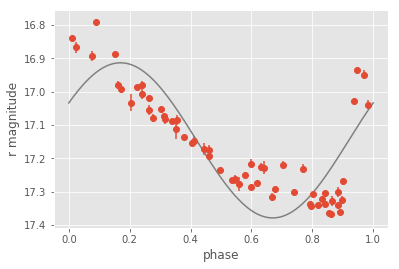

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')
#mpl.rc('axes', prop_cycle=["#4C72B0", "#55A868", "#C44E52",
#                            "#8172B2", "#CCB974"])

# Fetch the RRLyrae data
from gatspy import datasets, periodic
rrlyrae = datasets.fetch_rrlyrae()

# Get data from first lightcurve
lcid = rrlyrae.ids[0]
t, mag, dmag, filts = rrlyrae.get_lightcurve(lcid)
mask = (filts == 'r')
t_r, mag_r, dmag_r = t[mask], mag[mask], dmag[mask]

# Fit the Lomb-Scargle model
model = periodic.LombScargleFast()
model.fit(t_r, mag_r, dmag_r)
model.optimizer.period_range = (0.2, 1.2)

# Predict on a regular phase grid
period = model.best_period
tfit = np.linspace(0, period, 1000)
magfit = model.predict(tfit)

# Plot the results
phase = (t_r / period) % 1
phasefit = (tfit / period)

fig, ax = plt.subplots()
ax.errorbar(phase, mag_r, dmag_r, fmt='o')
ax.plot(phasefit, magfit, '-', color='gray')
ax.set(xlabel='phase', ylabel='r magnitude')
ax.invert_yaxis()